In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\COMMAT_classification sc\code\DATASET_ weka_679.csv")

In [3]:
df['SSA(m2/g)'] = df['SSA(m2/g)']/1000

In [4]:
df.head()

,SSA(m2/g),Pore size(nm),Pore Volume (cm3/g),Potential,Nitrogen %,Id/Ig,Specific Capacitance
0,0.63,1.50,0.0,0.25,0.0,0.0,80.0
1,1.00,1.75,0.0,0.25,0.0,0.0,125.0
2,1.50,2.50,0.0,0.25,0.0,0.0,175.0
3,1.40,2.90,0.0,0.25,0.0,0.0,160.0
4,0.85,1.25,0.0,0.25,0.0,0.0,95.0


In [5]:
df = df.rename(columns={'SSA(m2/g)': 'SSA','Pore size(nm)': 'PS', 'Pore Volume (cm3/g)': 'PV' , 'Nitrogen %':'NC' ,  'Specific Capacitance':'SC'})

In [6]:
df.head()

,SSA,PS,PV,Potential,NC,Id/Ig,SC
0,0.63,1.50,0.0,0.25,0.0,0.0,80.0
1,1.00,1.75,0.0,0.25,0.0,0.0,125.0
2,1.50,2.50,0.0,0.25,0.0,0.0,175.0
3,1.40,2.90,0.0,0.25,0.0,0.0,160.0
4,0.85,1.25,0.0,0.25,0.0,0.0,95.0


In [7]:
df.describe()

,SSA,PS,PV,Potential,NC,Id/Ig,SC
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000
mean,1.166802,1.714821,0.867994,1.296057,1.329385,0.555733,188.130824
std,0.883202,2.616503,0.861877,0.792527,2.875535,0.798127,104.478231
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.461500,0.000000,0.238000,1.000000,0.000000,0.000000,120.000000
50%,1.016700,0.900000,0.690000,1.000000,0.000000,0.000000,176.500000
75%,1.641000,2.522500,1.295000,1.000000,1.137500,0.997500,247.750000
max,4.073000,27.200000,5.910000,4.000000,19.800000,4.540000,587.000000


In [8]:
# To select all columns except the last one for X1, and the last column for y1:
X = df.iloc[:, :-1]  # Select all columns except the last one for features (X1)
y = df.iloc[:, -1]   # Select the last column as the target (y1)

In [9]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split, learning_curve
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train

,SSA,PS,PV,Potential,NC,Id/Ig
182,0.477,1.96,0.230,1.0,0.00,1.01
89,0.000,0.00,0.000,0.8,0.00,1.12
185,2.086,2.10,1.100,1.0,0.00,0.00
148,1.578,0.00,1.092,1.2,0.68,0.00
204,0.521,0.00,0.380,1.0,7.30,1.00
...,...,...,...,...,...,...
71,3.110,0.70,1.680,1.0,0.00,0.00
106,0.787,5.81,1.140,1.0,0.00,0.00
270,1.588,0.00,1.010,0.9,5.30,0.84
435,1.417,2.22,1.560,1.0,1.99,1.01


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [12]:

# Initialize Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators=100,      # number of trees
    max_depth=None,        # let trees expand fully
    random_state=42
)

# Train the model
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print("R² Score value:", r2_score(y_test, y_pred))
print("RMSE value :", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score value: 0.5562624976056052
RMSE value : 69.05319817140577


In [13]:
# Initialize Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators=100,      # number of trees
    max_depth=5,        # let trees expand fully
    random_state=42
)

# Train the model
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print("R² Score value:", r2_score(y_test, y_pred))
print("MAE  value:", mean_absolute_error(y_test, y_pred))
print("RMSE value :", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score value: 0.5564930012837384
MAE  value: 52.886204575616134
RMSE value : 69.03526067043052


In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Define model
rf = RandomForestRegressor(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],     # number of trees
    'max_depth': [None, 5, 10, 20],      # depth of trees
    'min_samples_split': [2, 5, 10],     # min samples required to split
    'min_samples_leaf': [1, 2, 4],       # min samples per leaf
    'max_features': ['auto', 'sqrt']     # number of features considered at each split
}

# Grid Search with 10-fold cross validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=10,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_rf = grid_search.best_estimator_

# Predictions
y_pred = best_rf.predict(X_test)

# Evaluation
print("R² Score grid search cv 10:", r2_score(y_test, y_pred))
print("RMSE grid search cv 10:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE  grid search cv 10:", mean_absolute_error(y_test, y_pred))

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
384 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-pack

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
R² Score grid search cv 10: 0.6246693771550691
RMSE grid search cv 10: 63.50789674593263
MAE  grid search cv 10: 50.169646433767966


In [15]:
# Random Forest Regression with RandomizedSearchCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint



# Define model
rf = RandomForestRegressor(random_state=42)

# Hyperparameter distributions
param_dist = {
    'n_estimators': randint(100, 500),        # number of trees
    'max_depth': [None, 5, 10, 20, 30],       # tree depth
    'min_samples_split': randint(2, 11),      # min samples to split
    'min_samples_leaf': randint(1, 5),        # min samples per leaf
    'max_features': ['auto', 'sqrt', 'log2']  # features per split
}

# Randomized Search (10 iterations)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,          # only 10 random combinations
    cv=10,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Best model
best_rs = random_search.best_estimator_

# Predictions
y_pred = best_rs.predict(X_test)

# Evaluation
print("R² Score random search cv 10:", r2_score(y_test, y_pred))
print("MAE  random search cv 10:", mean_absolute_error(y_test, y_pred))
print("RMSE  random search cv 10:", np.sqrt(mean_squared_error(y_test, y_pred)))


Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 443}
R² Score random search cv 10: 0.6276637050788603
MAE  random search cv 10: 49.66203330339816
RMSE  random search cv 10: 63.25406152579213


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SSA        558 non-null    float64
 1   PS         558 non-null    float64
 2   PV         558 non-null    float64
 3   Potential  558 non-null    float64
 4   NC         558 non-null    float64
 5   Id/Ig      558 non-null    float64
 6   SC         558 non-null    float64
dtypes: float64(7)
memory usage: 30.6 KB


In [17]:
from sklearn.ensemble import RandomForestRegressor
# Initialize and train a Random Forest Regressor  'max_depth': None, 'max_features': 'sqrt', 
#'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
#rf_model_grid = RandomForestRegressor(n_estimators=300, max_depth= None, max_features = 'sqrt', random_state=42)
#rf_model_grid.fit(X, y)

In [18]:
# Get feature importance scores
#feature_importances = rf_model_grid.feature_importances_

In [19]:
rf_model_rs = RandomForestRegressor(n_estimators=443, max_depth= 10, max_features = 'sqrt', random_state=42)
rf_model_rs.fit(X, y)

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=443,
                      random_state=42)

Feature Importance Scores:
     Feature  Importance
0        SSA    0.304054
3  Potential    0.185334
4         NC    0.182687
2         PV    0.133630
1         PS    0.100232
5      Id/Ig    0.094063


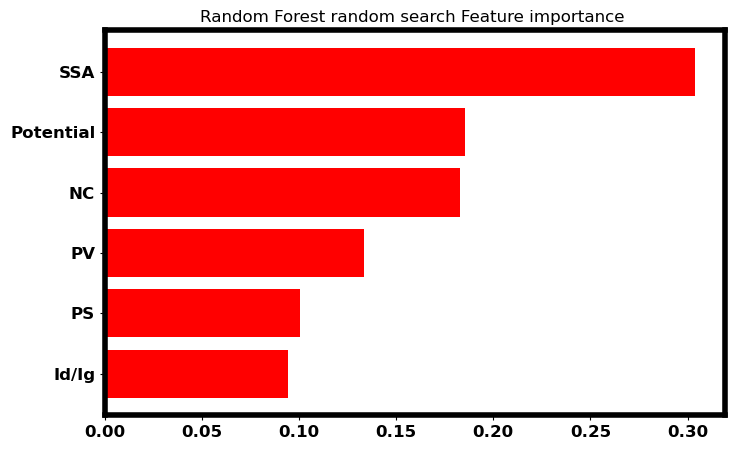

In [20]:
# Get feature importance scores
feature_importances = rf_model_rs.feature_importances_
# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print the feature importance scores
print("Feature Importance Scores:")
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(8, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='red')
plt.title('Random Forest random search Feature importance ')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top


#Make x-axis and y-axis numbers bold
plt.xticks(fontsize=12, fontweight='bold')  # Bold x-axis numbers
plt.yticks(fontsize=12, fontweight='bold')  # Bold y-axis numbers


# Bold black outline for the figure
plt.gca().spines["top"].set_linewidth(4)   # Top border
plt.gca().spines["right"].set_linewidth(4) # Right border
plt.gca().spines["bottom"].set_linewidth(4) # Bottom border
plt.gca().spines["left"].set_linewidth(4)  # Left border

plt.gca().spines["top"].set_color("black")
plt.gca().spines["right"].set_color("black")
plt.gca().spines["bottom"].set_color("black")
plt.gca().spines["left"].set_color("black")
plt.show()

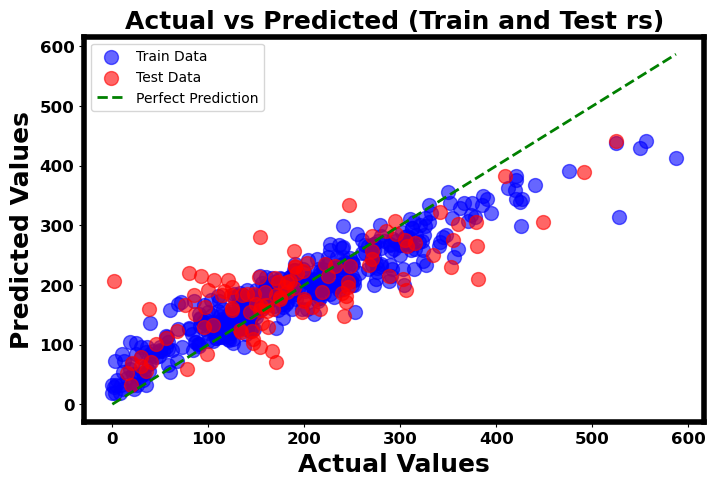

In [21]:

# Make predictions on both train and test data
y_train_pred = best_rs.predict(X_train)
y_test_pred =best_rs.predict(X_test)

# Plot actual vs predicted values for training and testing data
plt.figure(figsize=(8, 5))

# Plot for training data
plt.scatter(y_train, y_train_pred, color='blue', s=100, label='Train Data', alpha=0.6)

# Plot for testing data
plt.scatter(y_test, y_test_pred, color='red', s=100, label='Test Data', alpha=0.6)

# Plot a perfect prediction line
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='green', linewidth=2, linestyle='--', label='Perfect Prediction')

# Labels and title
plt.xlabel("Actual Values", fontweight="bold", fontsize=18)  # Bold x-axis label
plt.ylabel("Predicted Values", fontweight="bold", fontsize=18)  # Bold y-axis label
plt.title("Actual vs Predicted (Train and Test rs)", fontweight="bold", fontsize=18)
plt.legend()

#Make x-axis and y-axis numbers bold
plt.xticks(fontsize=12, fontweight='bold')  # Bold x-axis numbers
plt.yticks(fontsize=12, fontweight='bold')  # Bold y-axis numbers



# Bold black outline for the figure
plt.gca().spines["top"].set_linewidth(4)   # Top border
plt.gca().spines["right"].set_linewidth(4) # Right border
plt.gca().spines["bottom"].set_linewidth(4) # Bottom border
plt.gca().spines["left"].set_linewidth(4)  # Left border

plt.gca().spines["top"].set_color("black")
plt.gca().spines["right"].set_color("black")
plt.gca().spines["bottom"].set_color("black")
plt.gca().spines["left"].set_color("black")
plt.show()

In [22]:
# Create a DataFrame for better visualization
RF_df = pd.DataFrame({
    'Actual_SC': y_test,
    'Predicted_SC': y_test_pred
})
print(RF_df)
# Save to Excel
RF_df.to_excel('Random forest_df.xlsx', index=False)

     Actual_SC  Predicted_SC
158      378.5    305.268924
451      360.0    301.923556
55       156.0    135.915071
247      145.0    121.996298
70       295.0    284.744098
..         ...           ...
11       333.9    250.129465
374      246.0    334.589738
22       225.0    214.710117
381      161.0    155.906945
373      208.0    163.867313

[112 rows x 2 columns]


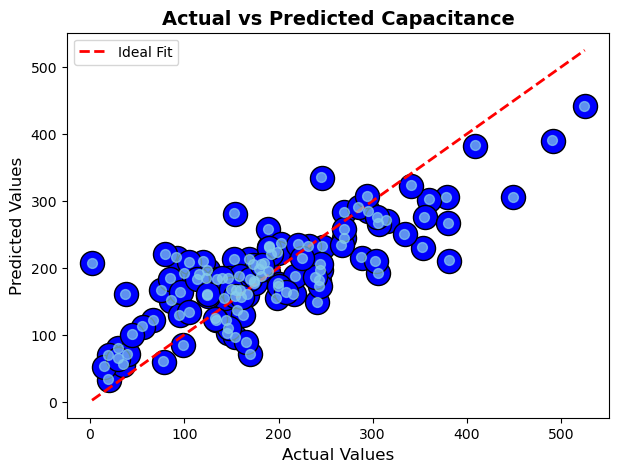

In [23]:
actual = y_test
predicted = y_test_pred

plt.figure(figsize=(7,5))

# Main "beveled/glossy" points (solid with outline)
plt.scatter(actual, predicted,
            s=300, color="blue", edgecolor="black", linewidth=1)

# Add "shine highlight" overlay for glossy look
for xs, ys in zip(actual, predicted):
    plt.scatter(xs-0.5, ys+0.5,   # slight offset
                s=50, color="skyblue", alpha=0.7, zorder=3)

# 45-degree line (perfect prediction reference)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)],
         color="red", linestyle="--", linewidth=2, label="Ideal Fit", zorder=1)

# Titles and labels
plt.title("Actual vs Predicted Capacitance", fontsize=14, fontweight="bold")
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)

plt.legend()
plt.grid(False)
plt.show()


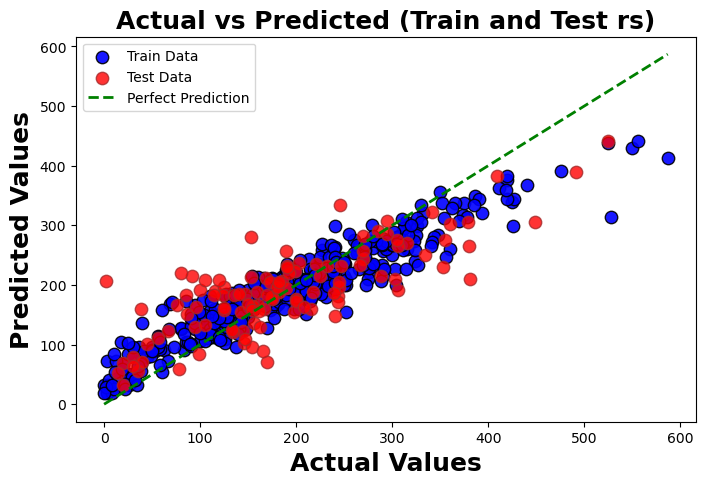

In [44]:
plt.figure(figsize=(8, 5))

# Plot for training data
plt.scatter(y_train, y_train_pred, color='blue',edgecolor="black", s=80, label='Train Data', alpha=0.9)

# Plot for testing data
plt.scatter(y_test, y_test_pred, color='red', edgecolor="brown", s=80, label='Test Data', alpha=0.8)


# Plot a perfect prediction line
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='green', linewidth=2, linestyle='--', label='Perfect Prediction')

# Labels and title
plt.xlabel("Actual Values", fontweight="bold", fontsize=18)  # Bold x-axis label
plt.ylabel("Predicted Values", fontweight="bold", fontsize=18)  # Bold y-axis label
plt.title("Actual vs Predicted (Train and Test rs)", fontweight="bold", fontsize=18)
plt.legend()
plt.show()

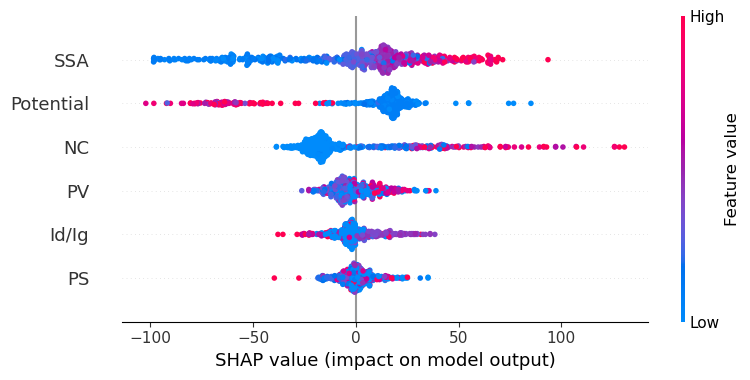

In [45]:
import shap
explainer = shap.TreeExplainer(rf_model_rs)
shap_values = explainer.shap_values(X)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X)